In [ ]:
!pip3 install --upgrade torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117
!pip3 install roboflow
!pip3 install --upgrade ultralytics

In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
ROBOFLOW_API_KEY = user_secrets.get_secret("ROBOFLOW_API")

from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("zhihang").project("fruits-and-vegetables-knetf-9dd0s")
dataset = project.version(1).download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-and-Vegetables-1 in yolov11:: 100%|██████████| 3670/3670 [00:00<00:00, 3675.42it/s]


In [6]:
!cat /kaggle/working/Fruits-and-Vegetables-1/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 22
names: ['apple', 'banana', 'bell_pepper', 'cabbage', 'carrot', 'chilli_pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'grape', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'pineapple', 'potato', 'sweetpotato', 'tomato', 'watermelon']

roboflow:
  workspace: zhihang
  project: fruits-and-vegetables-knetf-9dd0s
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/zhihang/fruits-and-vegetables-knetf-9dd0s/dataset/1

In [7]:
!yolo task=detect mode=train epochs=50 data=/kaggle/working/Fruits-and-Vegetables-1/data.yaml model=yolo11m.pt patience=30

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|██████████████████████████████████████| 38.8M/38.8M [00:23<00:00, 1.70MB/s]
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/Fruits-and-Vegetables-1/data.yaml, epochs=50, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=Tru

In [ ]:
#!yolo task=detect mode=train resume model=/kaggle/working/runs/detect/train/weights/best.pt data=/kaggle/working/Fruits-and-Vegetables-1/data.yaml epochs=100

In [13]:
!ls /kaggle/working/runs/detect/train

args.yaml					  train_batch1.jpg
confusion_matrix_normalized.png			  train_batch2.jpg
confusion_matrix.png				  train_batch3200.jpg
events.out.tfevents.1743510771.df09ac55cac8.85.0  train_batch3201.jpg
F1_curve.png					  train_batch3202.jpg
labels_correlogram.jpg				  val_batch0_labels.jpg
labels.jpg					  val_batch0_pred.jpg
P_curve.png					  val_batch1_labels.jpg
PR_curve.png					  val_batch1_pred.jpg
R_curve.png					  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


--------------------- batch0 ---------------------


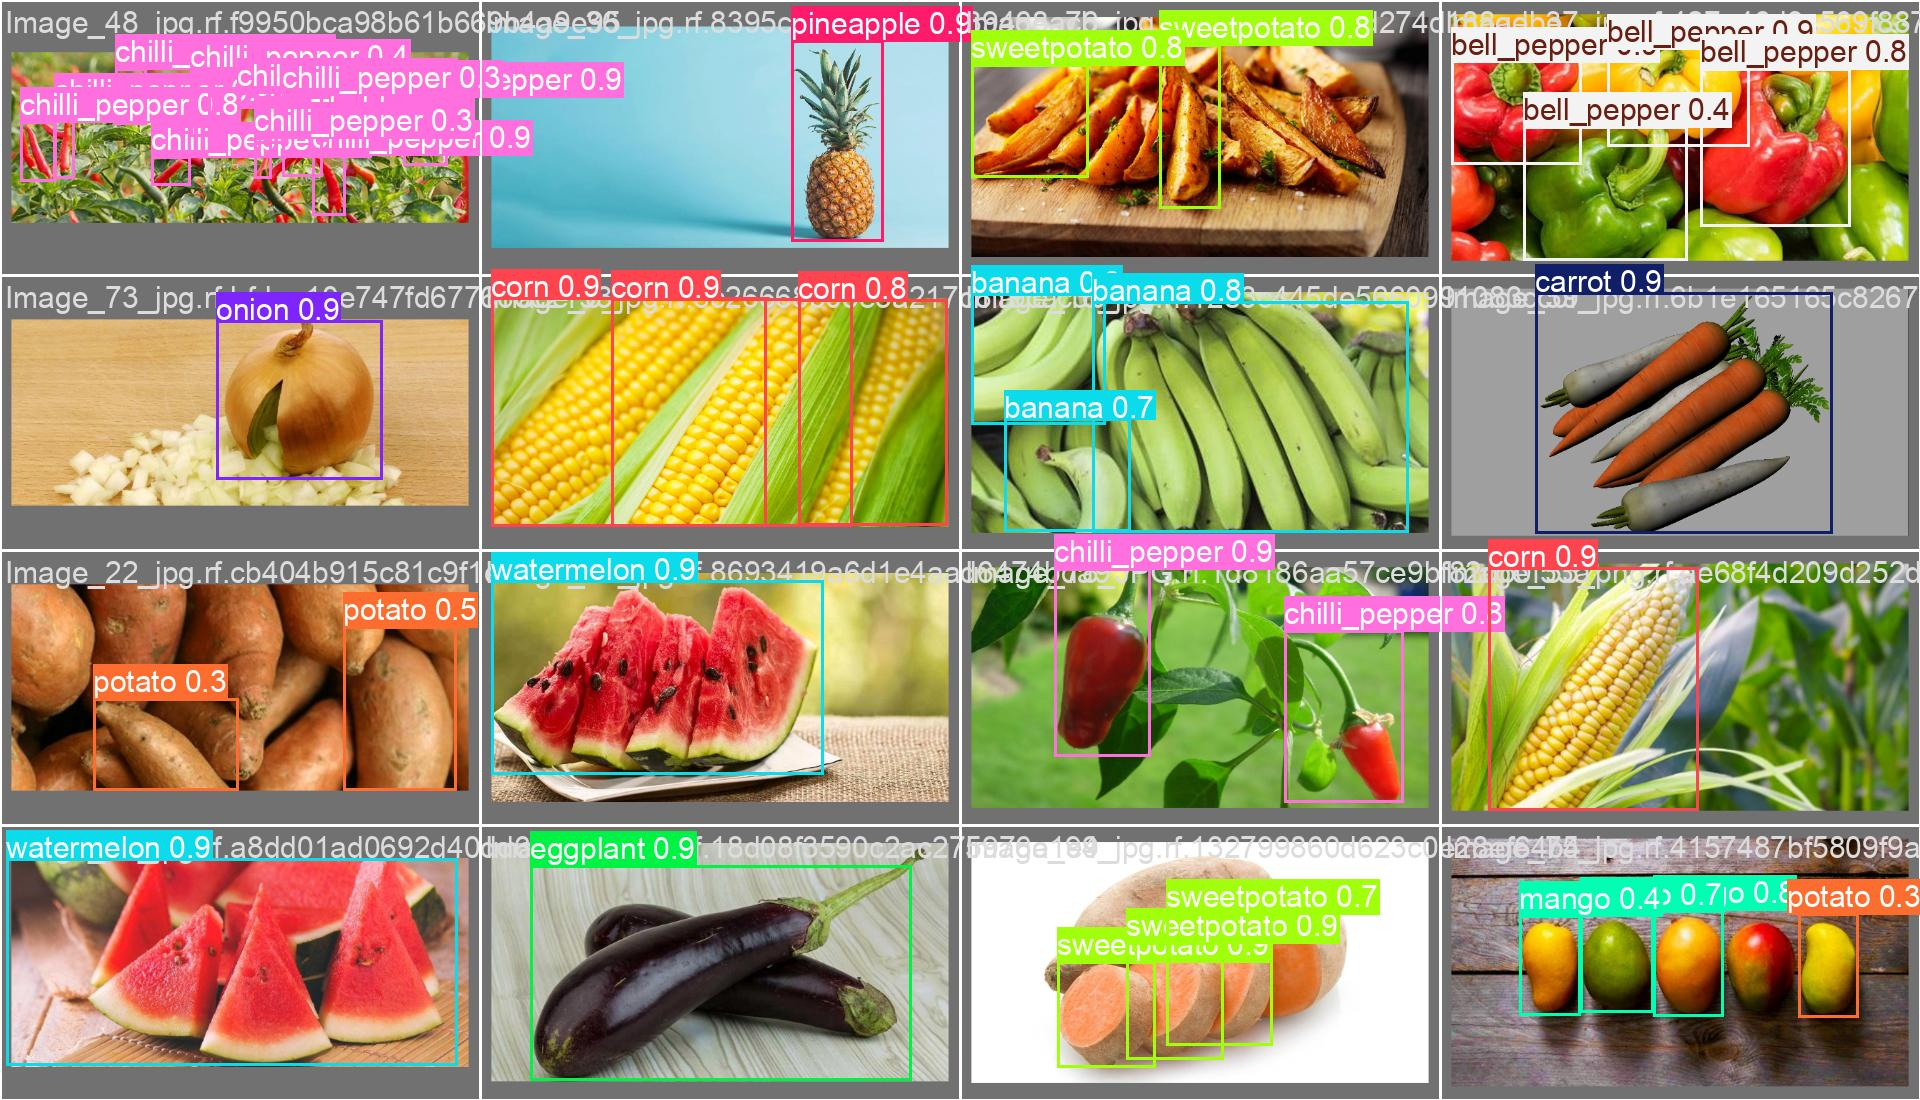

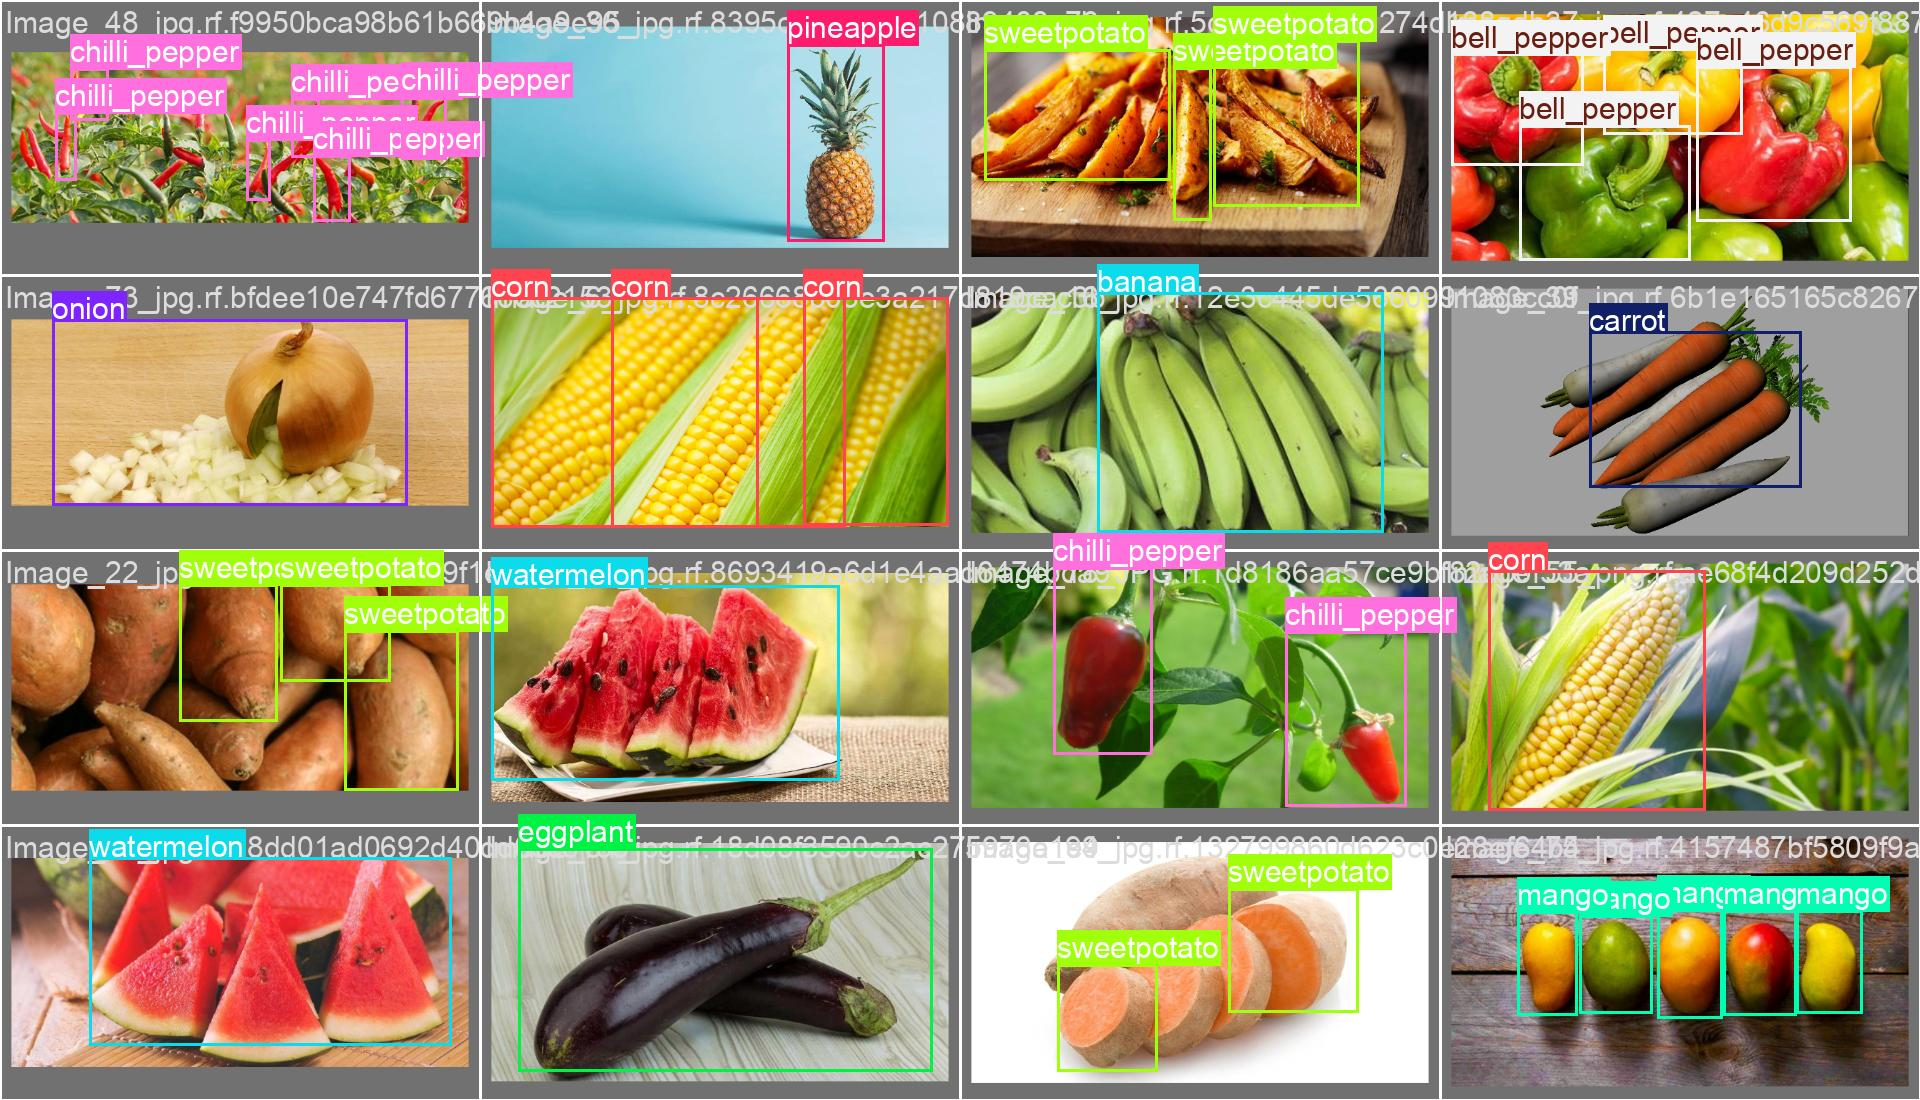

--------------------- batch1 ---------------------


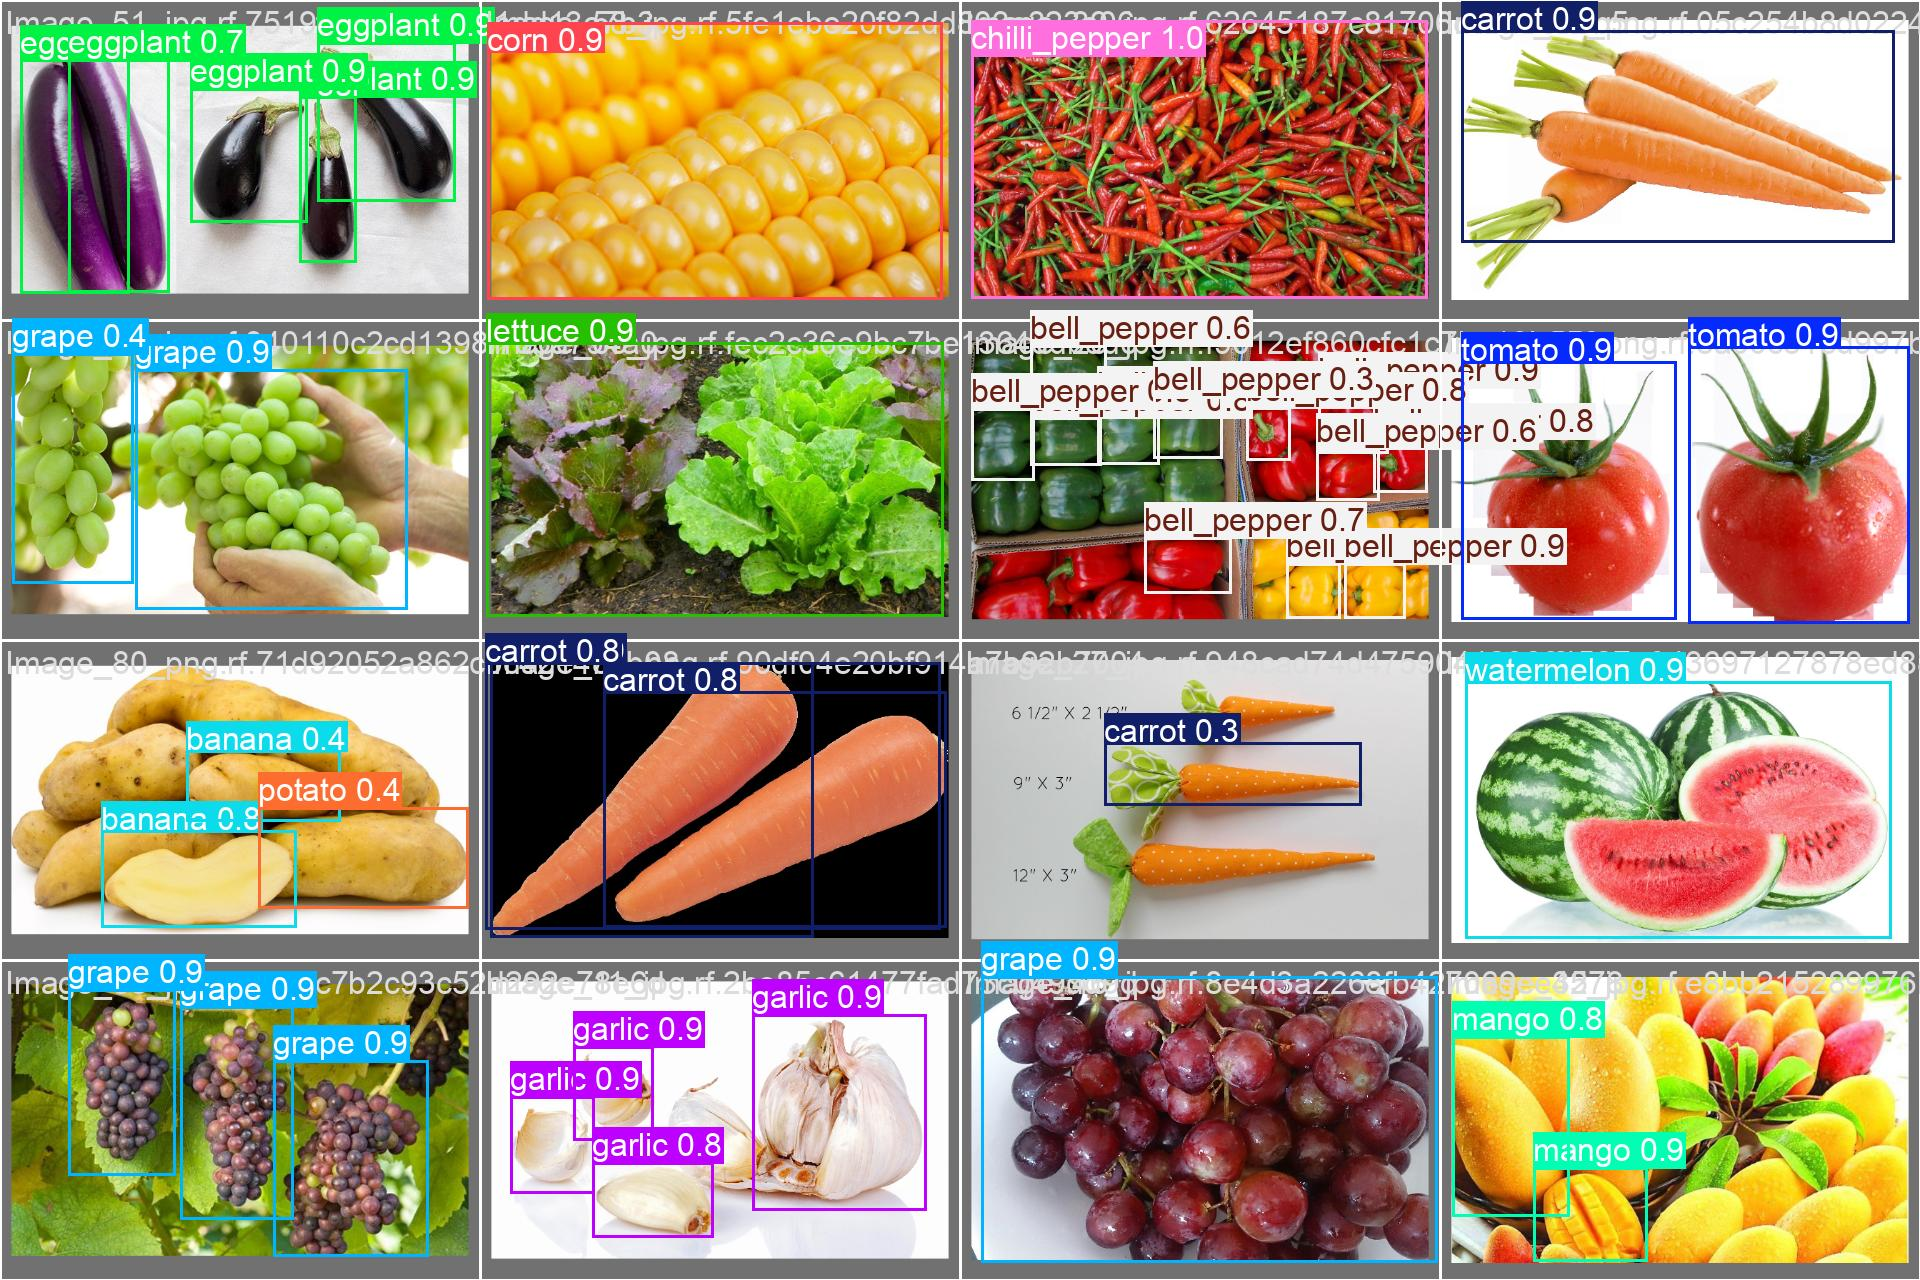

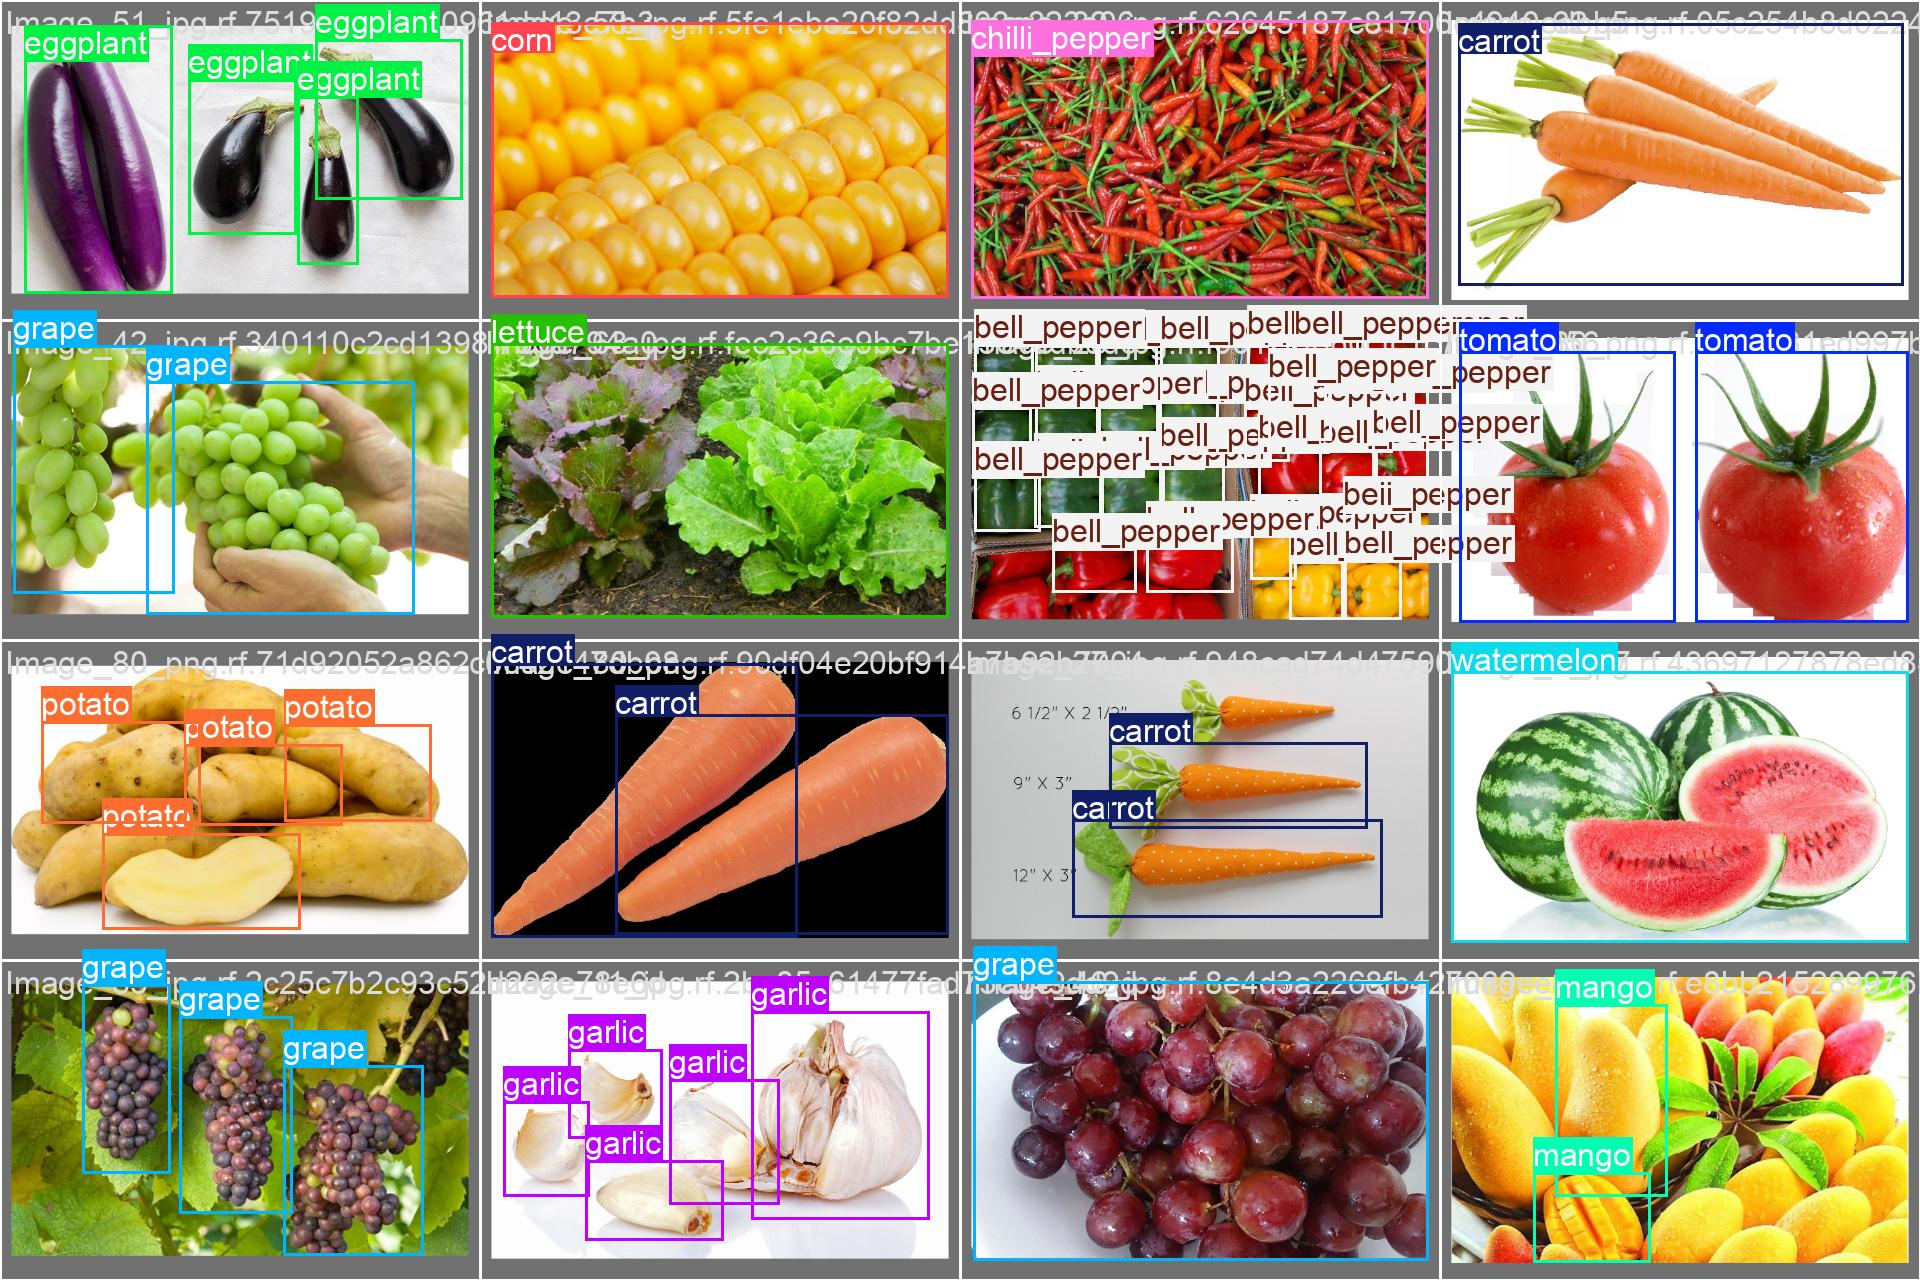

--------------------- batch2 ---------------------


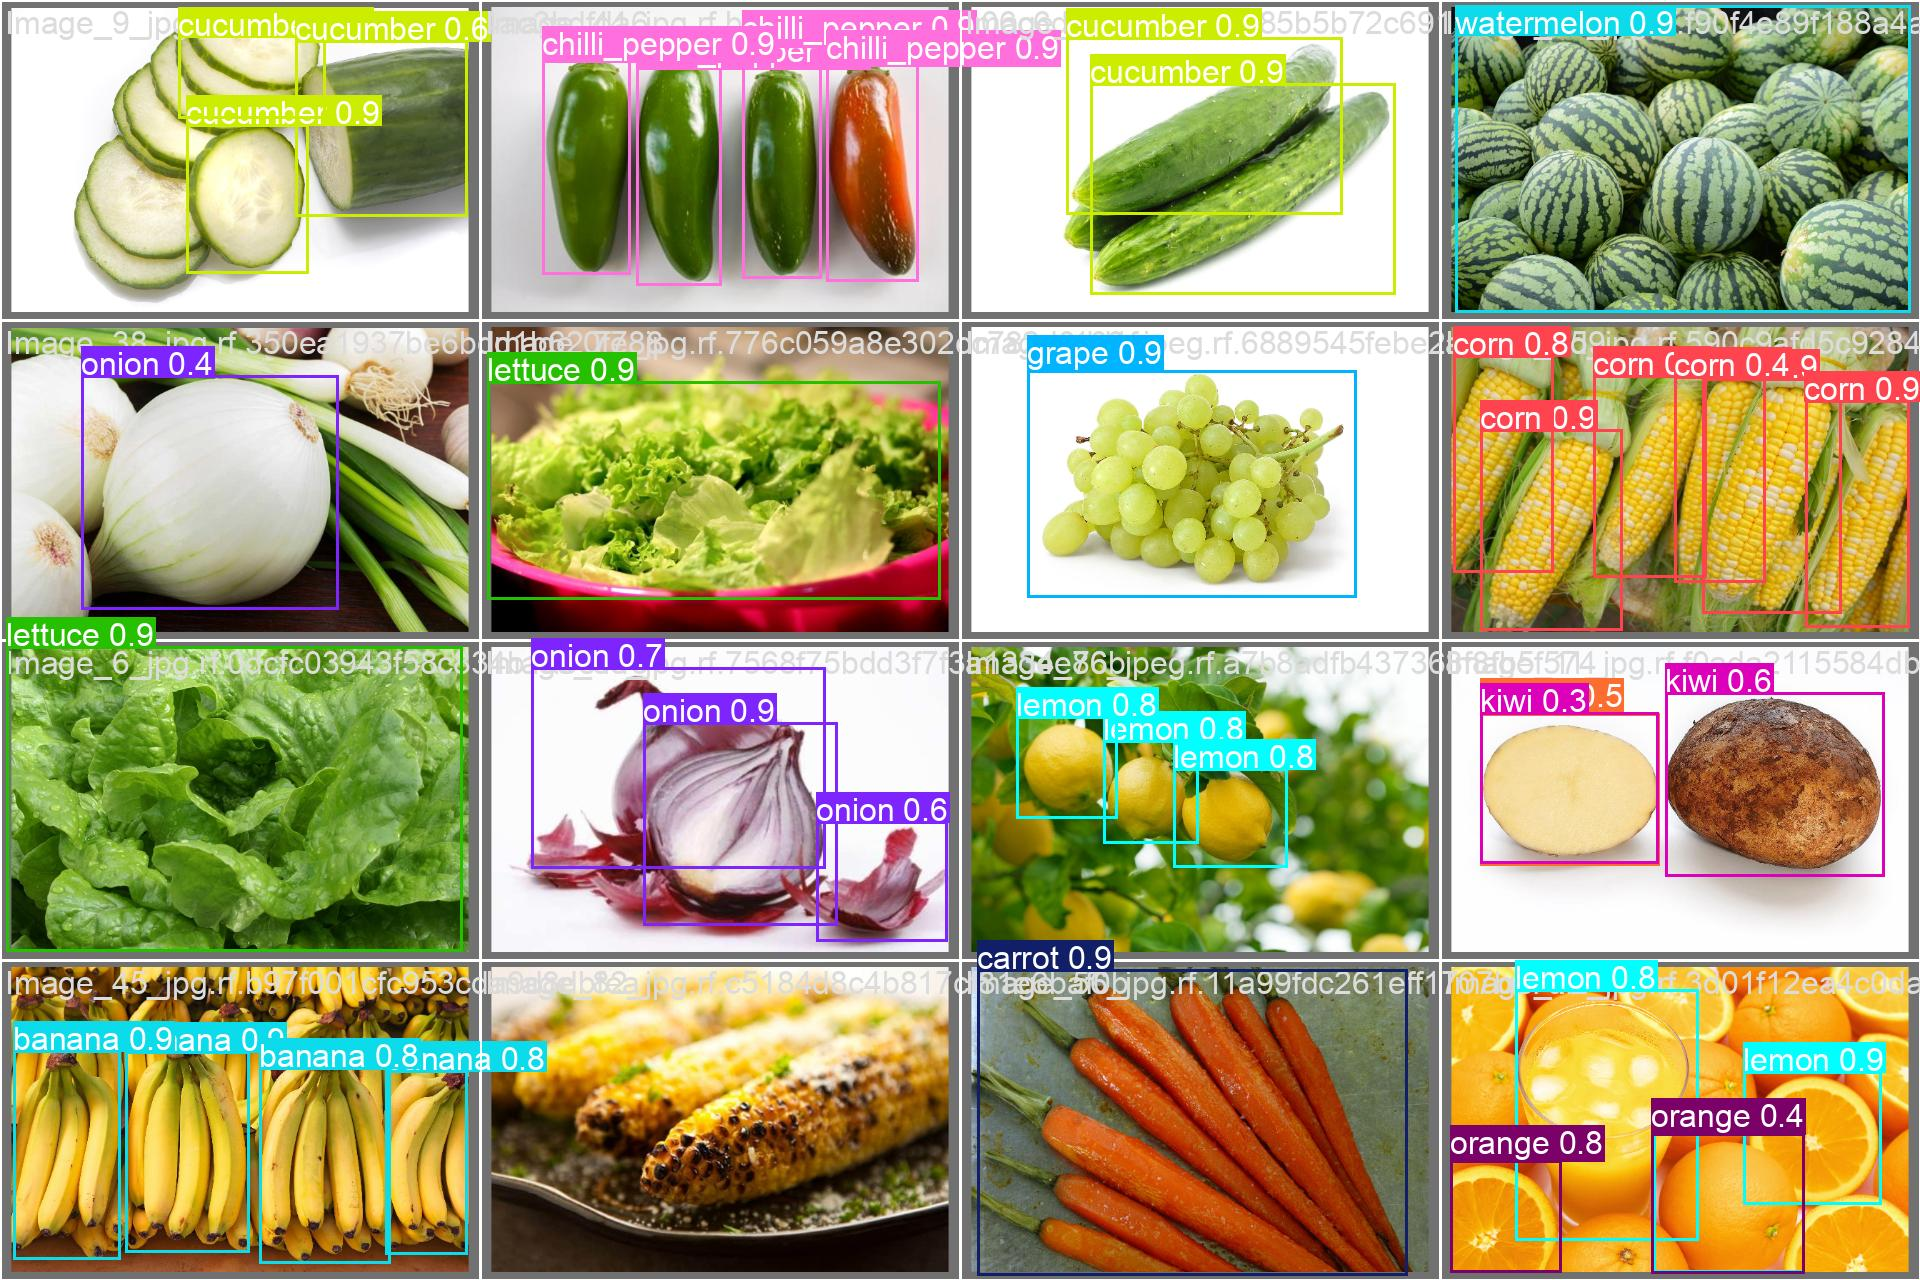

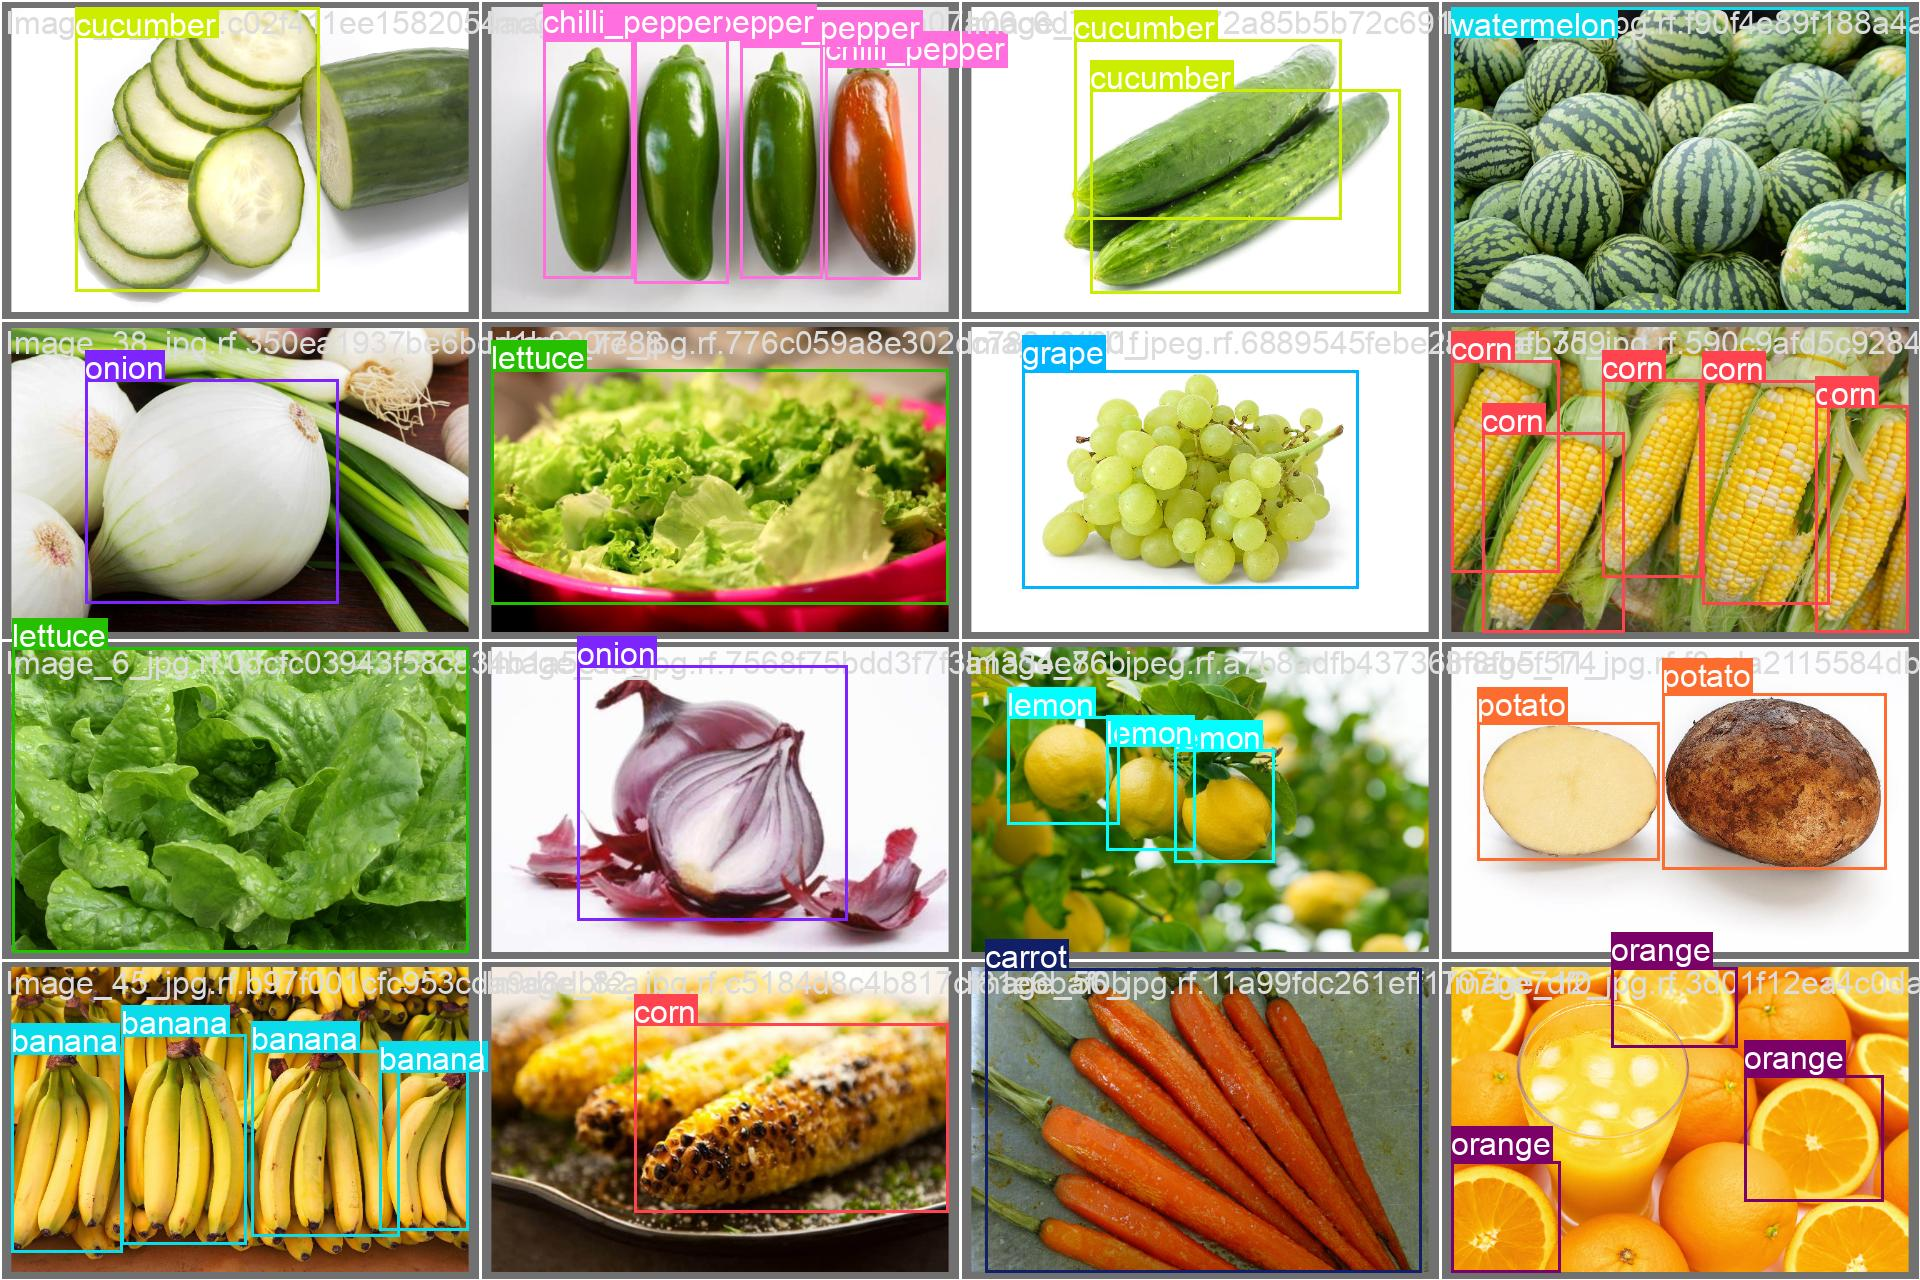

In [36]:
from IPython.display import display, Image

print("--------------------- batch0 ---------------------")
display(Image(filename='/kaggle/working/runs/detect/train/val_batch0_pred.jpg'))
display(Image(filename='/kaggle/working/runs/detect/train/val_batch0_labels.jpg'))
print("--------------------- batch1 ---------------------")
display(Image(filename='/kaggle/working/runs/detect/train/val_batch1_pred.jpg'))
display(Image(filename='/kaggle/working/runs/detect/train/val_batch1_labels.jpg'))
print("--------------------- batch2 ---------------------")
display(Image(filename='/kaggle/working/runs/detect/train/val_batch2_pred.jpg'))
display(Image(filename='/kaggle/working/runs/detect/train/val_batch2_labels.jpg'))


0: 640x640 1 watermelon, 17.7ms
Speed: 3.1ms preprocess, 17.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12


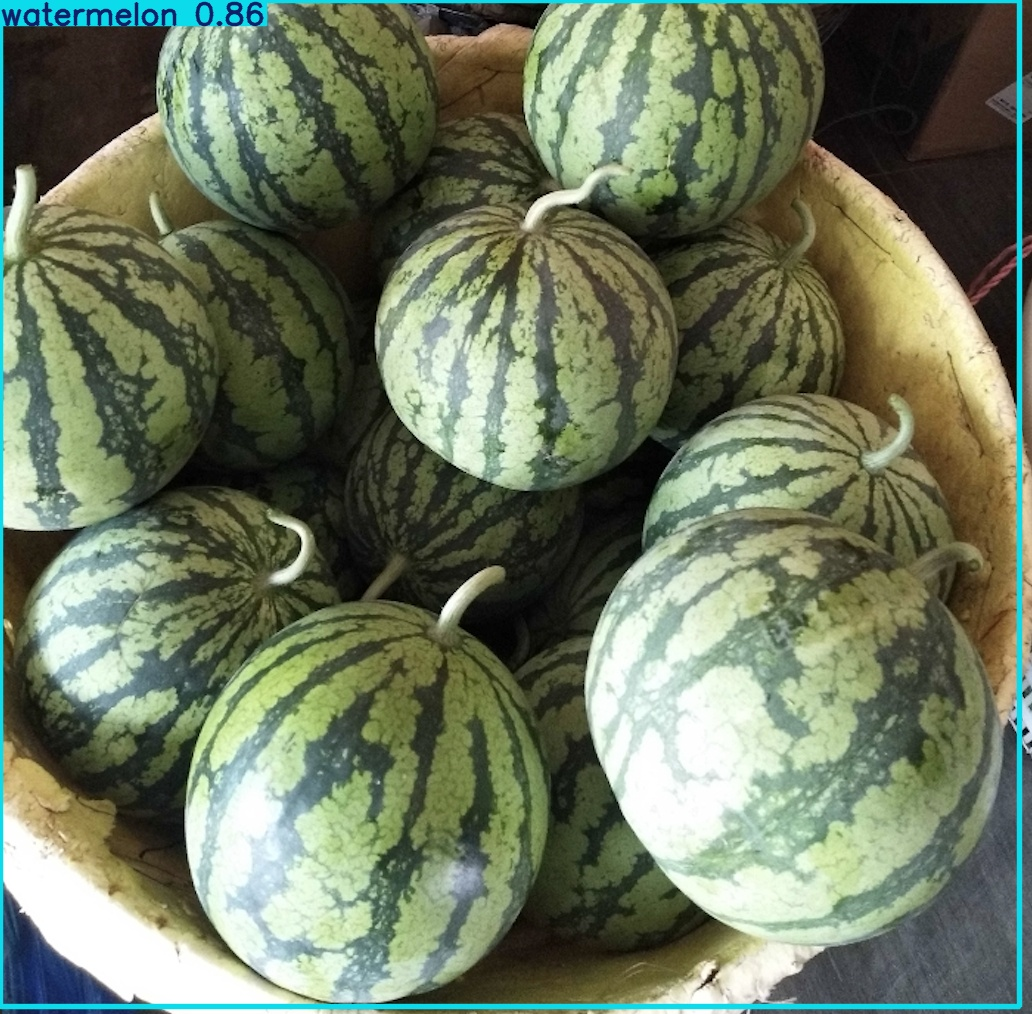

In [41]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display
from IPython.display import Image as DisplayImage
import requests

url = 'https://akynazh.site/images/pub/watermelon_d79dab34-ddf3-41fd-b6b6-8149bedc4670.png'
image = Image.open(requests.get(url, stream=True).raw)

model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")
results = model.predict(source=image, conf=0.2, save=True)  # save plotted images
# print(results)
display(DisplayImage(filename=results[0].save_dir + "/" + results[0].path))

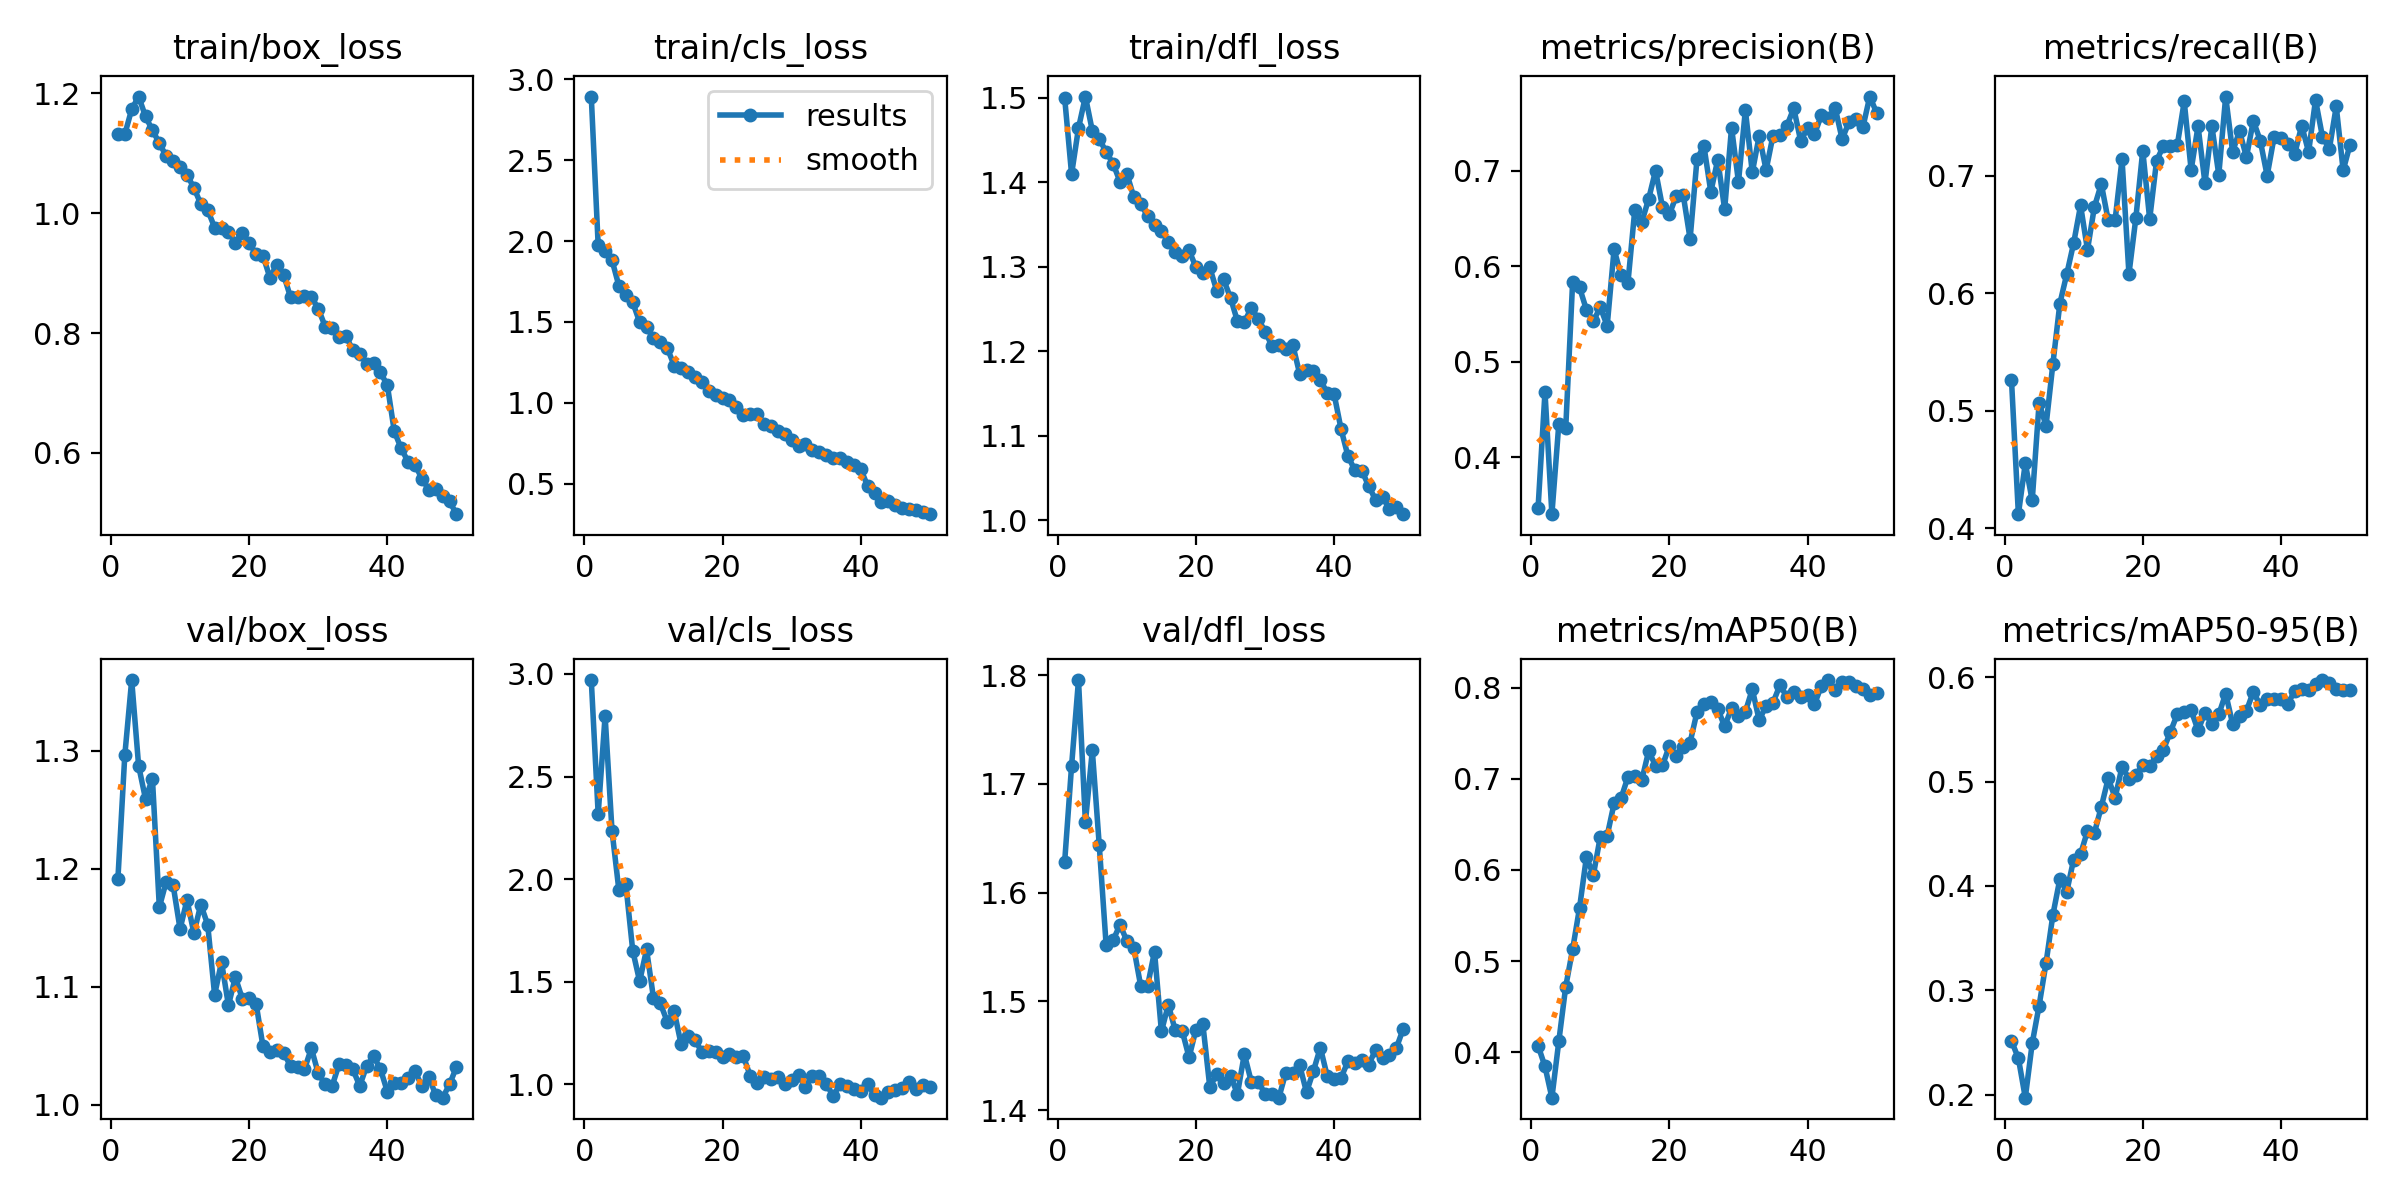

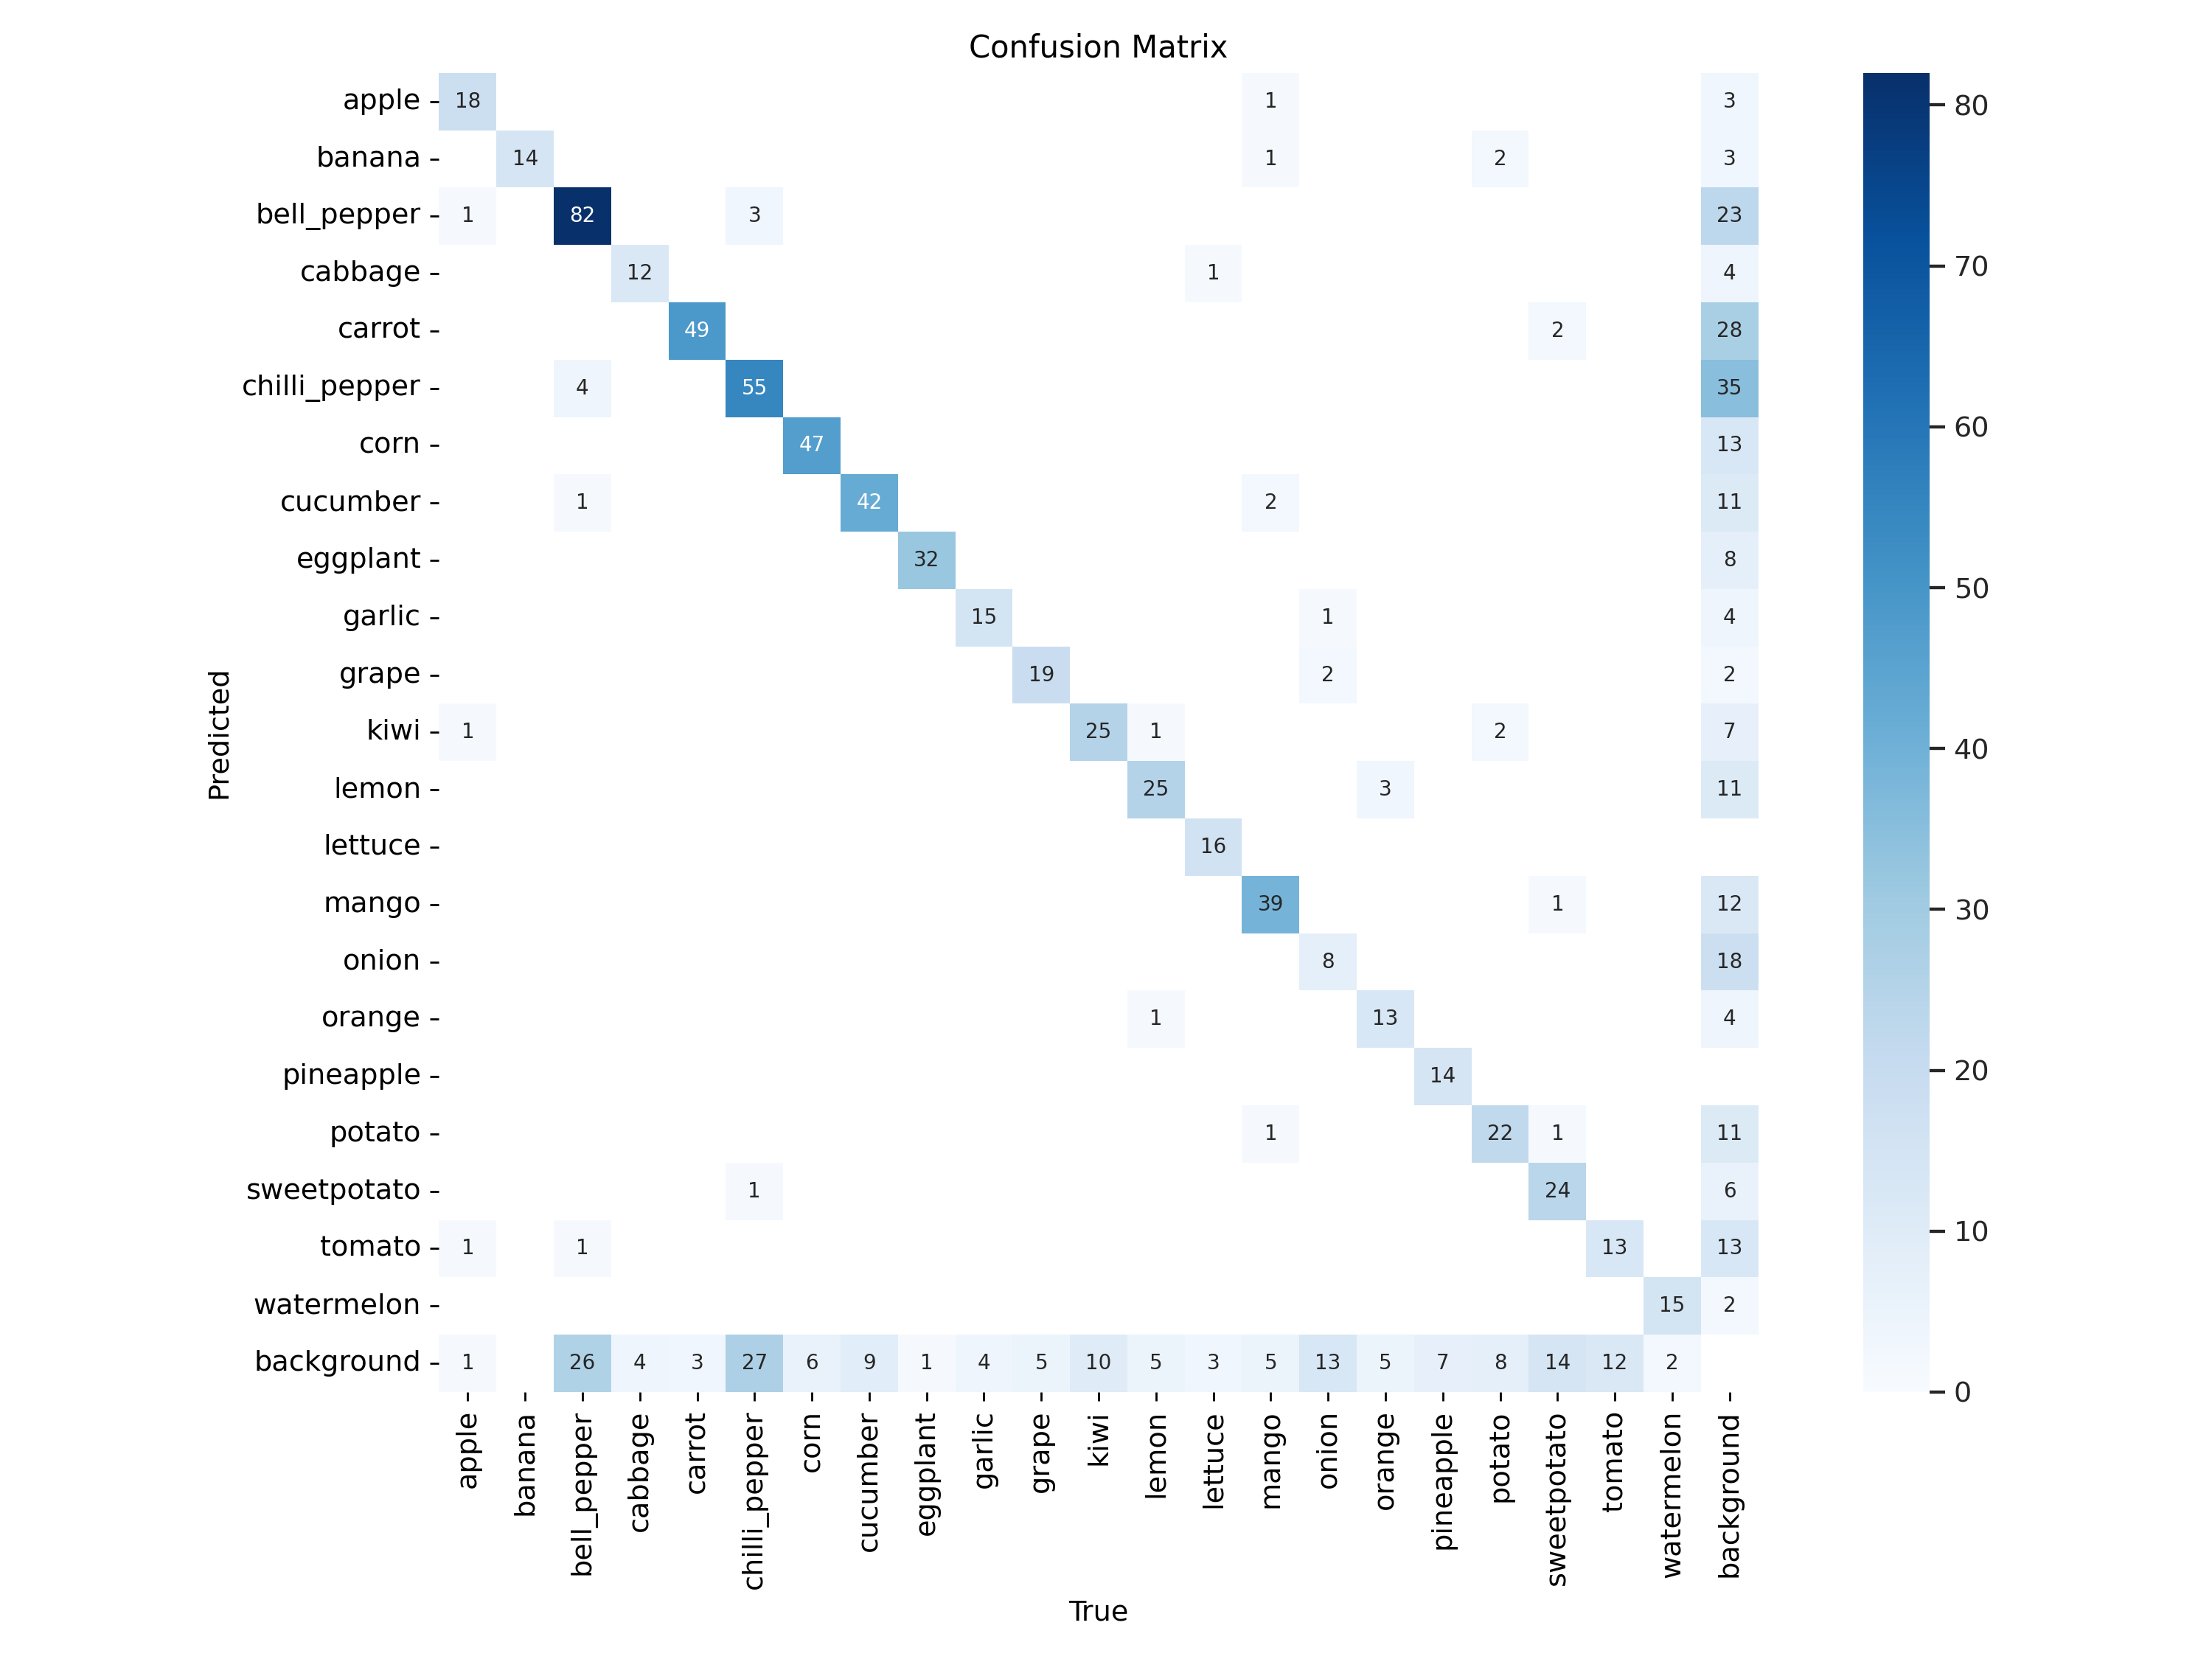

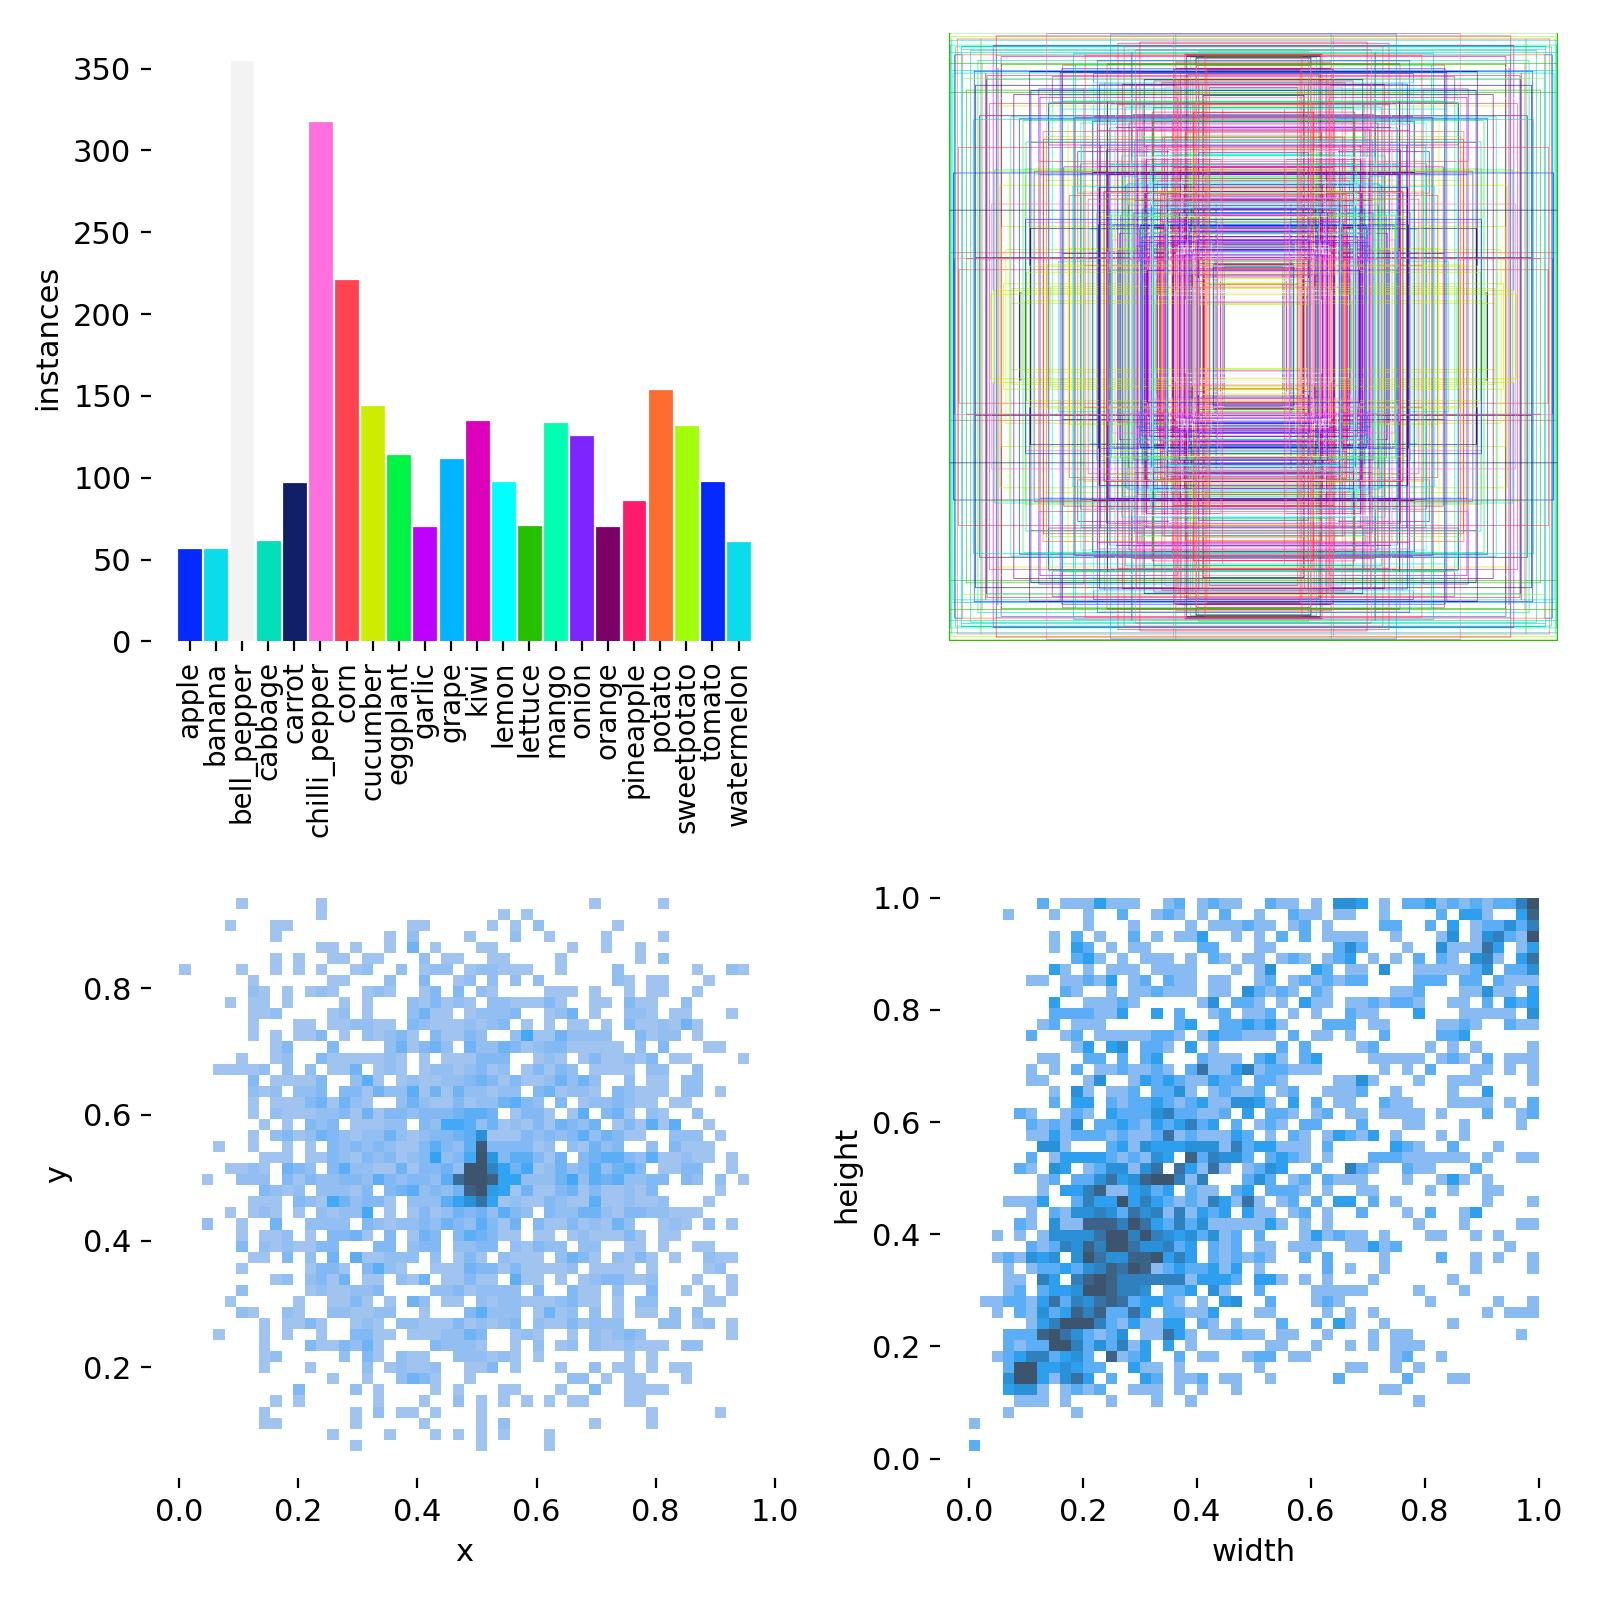

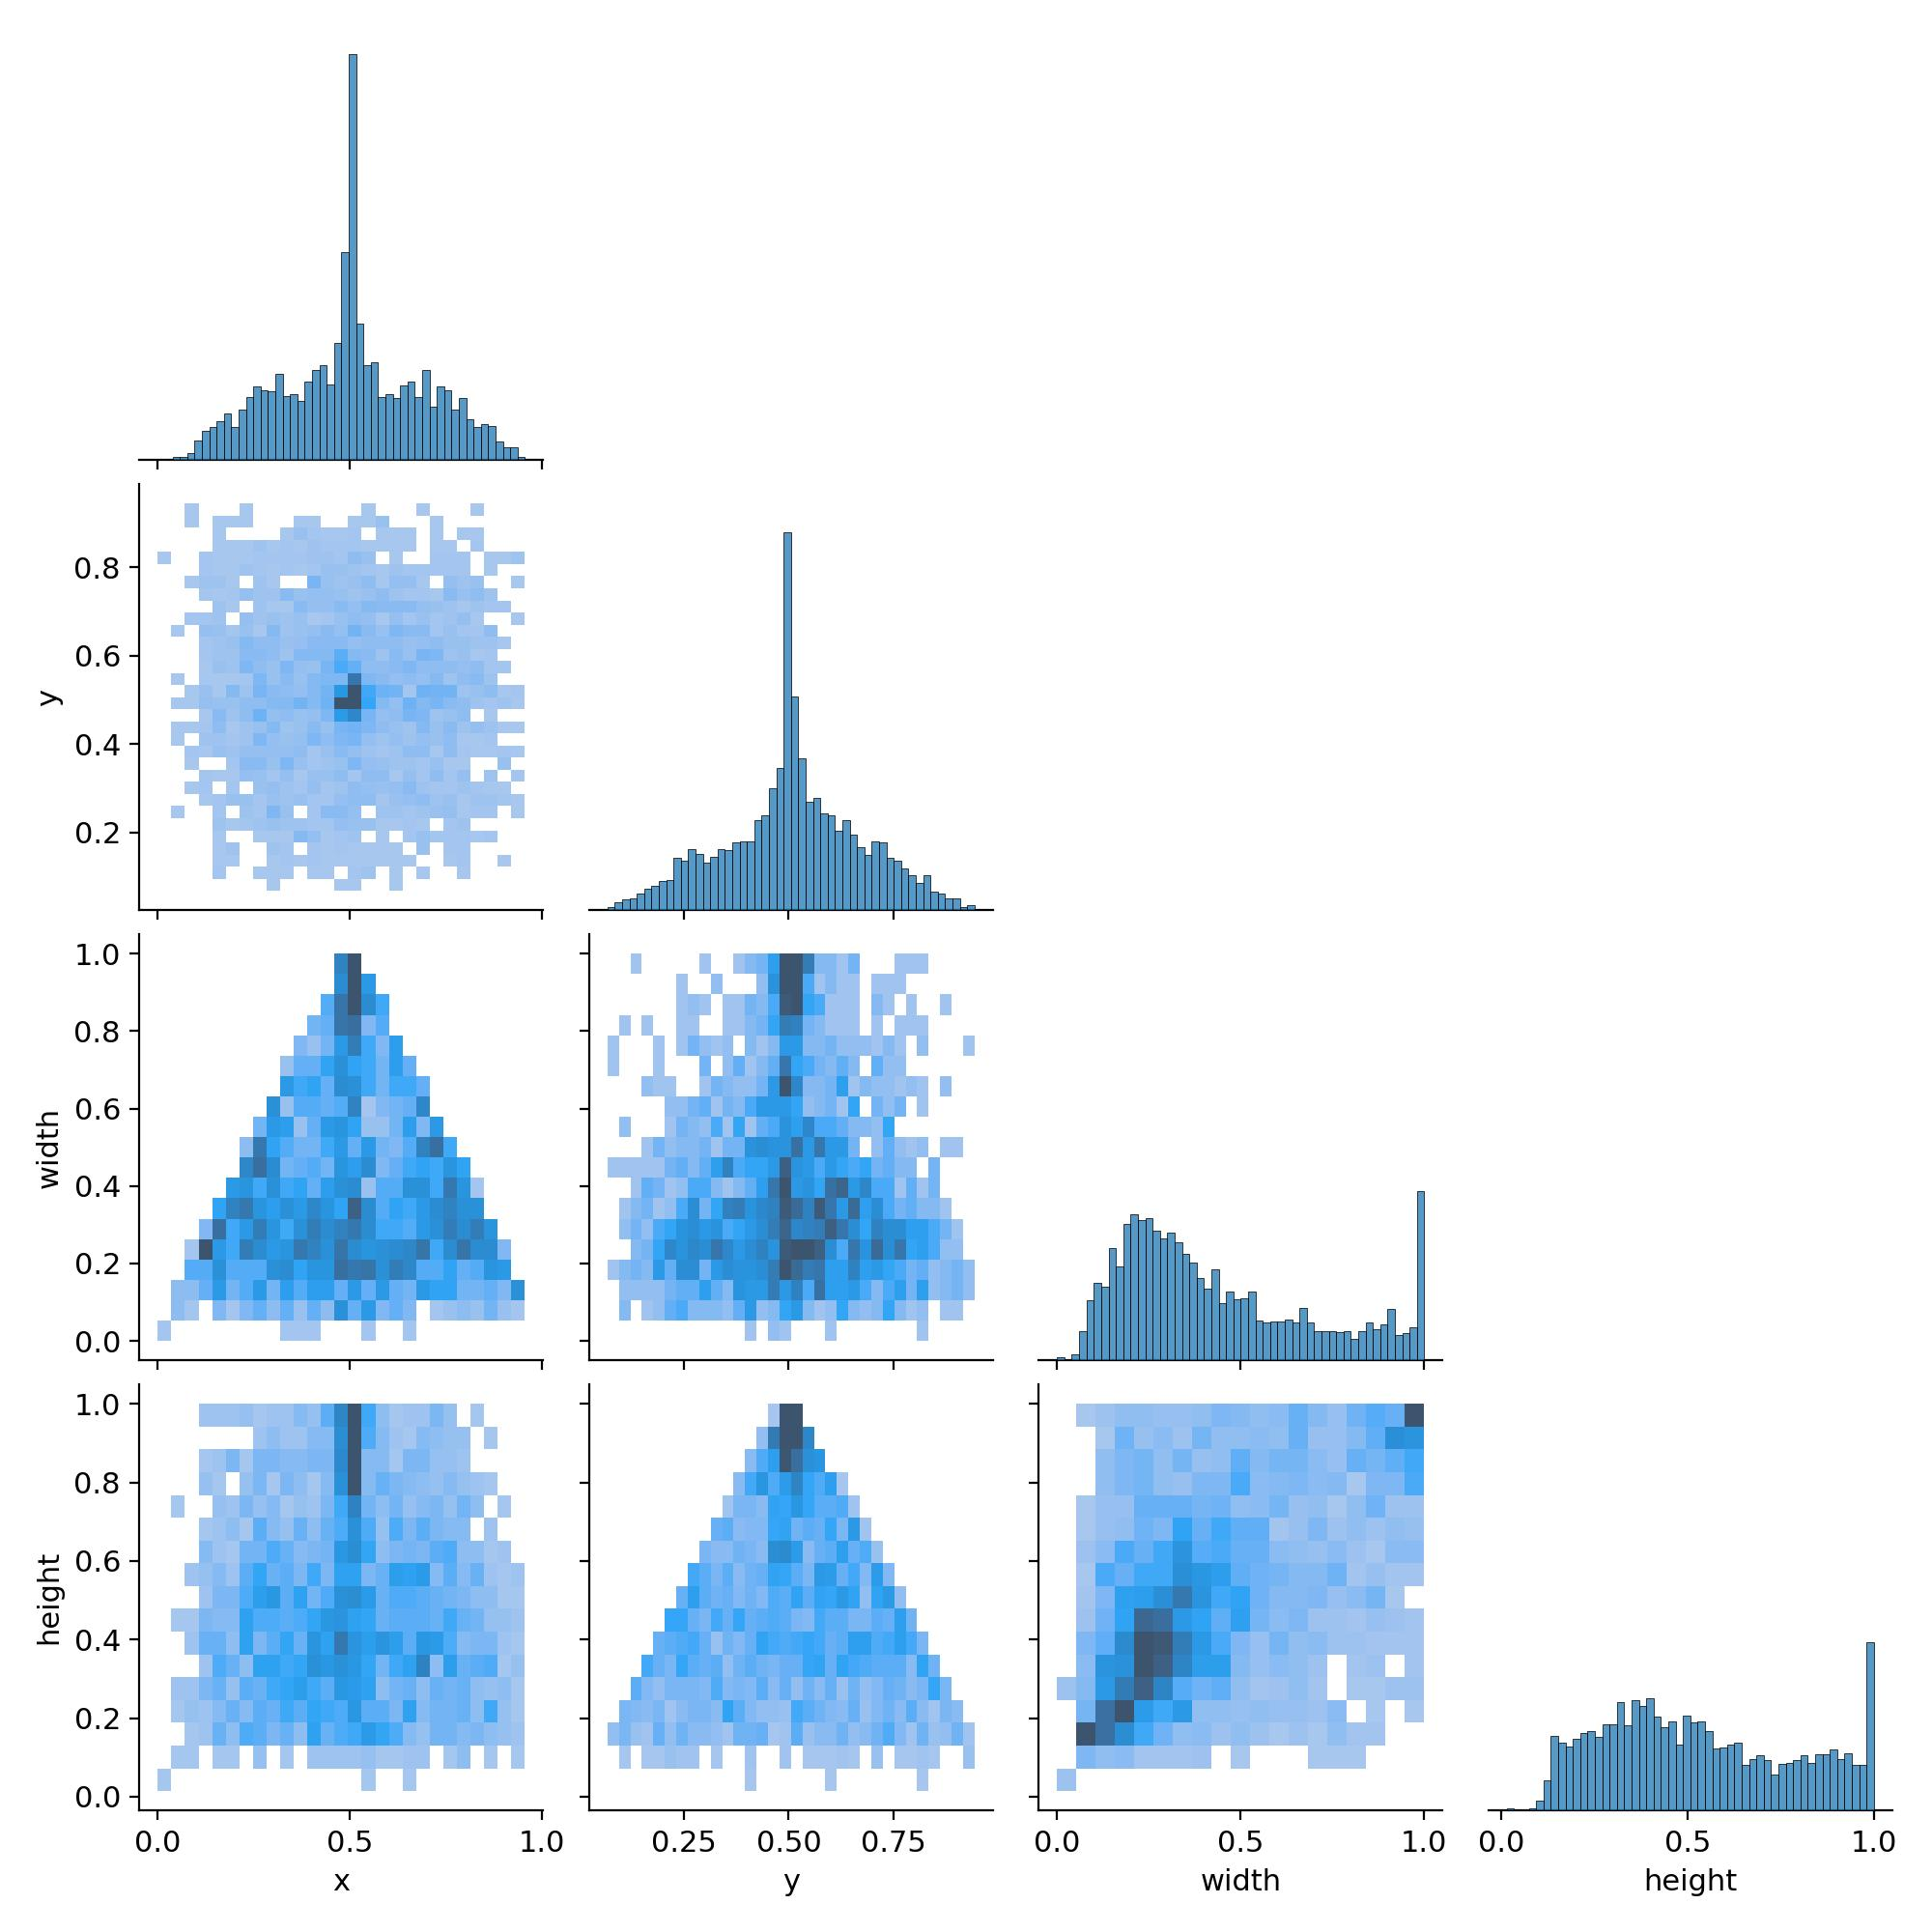

In [33]:
from IPython.display import display, Image

display(Image(filename='/kaggle/working/runs/detect/train/results.png'))
display(Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png'))
display(Image(filename='/kaggle/working/runs/detect/train/labels.jpg'))
display(Image(filename='/kaggle/working/runs/detect/train/labels_correlogram.jpg'))